In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import os
import operator
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [7]:
data = pd.read_csv('/content/drive/My Drive/merged_dataset_dachealthcare.csv')


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7332 entries, 0 to 7331
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   iso_code                   7332 non-null   object 
 1   continent                  6938 non-null   object 
 2   location                   7332 non-null   object 
 3   date                       7332 non-null   object 
 4   total_cases                7332 non-null   int64  
 5   new_cases                  7331 non-null   float64
 6   total_cases_growth         7332 non-null   float64
 7   total_deaths               7332 non-null   int64  
 8   new_deaths                 7330 non-null   float64
 9   positive_rate              6209 non-null   float64
 10  tests_per_case             6208 non-null   float64
 11  tests_units                6871 non-null   object 
 12  total_vaccinations         6912 non-null   float64
 13  people_vaccinated          6758 non-null   float

In [ ]:
data.describe()

,total_cases,new_cases,total_deaths,new_deaths,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,Pfizer/BioNTech,Moderna,Oxford/AstraZeneca,Johnson&Johnson,Sputnik V,Sinovac,Sinopharm/Beijing,CanSino
count,7.332000e+03,7.331000e+03,7332.000000,7330.000000,6209.000000,6208.000000,6.912000e+03,6.758000e+03,6.666000e+03,4.193000e+03,6.838000e+03,7.332000e+03,7.332000e+03,7.332000e+03,7.332000e+03,7.332000e+03,7.332000e+03,7.332000e+03,7.332000e+03,7332.000000
mean,5.180963e+06,2.117587e+04,106545.844517,222.246248,0.085306,84.661614,5.561099e+07,3.027266e+07,2.508636e+07,4.625334e+06,3.218961e+05,6.599577e+07,3.403951e+07,9.774490e+06,4.594854e+06,1.264022e+06,7.954950e+04,1.446984e+06,4.166376e+05,22926.783142
std,1.127713e+07,8.114207e+04,200753.406685,548.805813,0.087341,930.323521,1.254531e+08,6.488559e+07,5.736259e+07,1.704803e+07,6.715389e+05,1.150523e+08,8.129436e+07,3.004878e+07,1.211969e+07,3.584330e+06,3.638736e+05,4.296655e+06,2.140001e+06,104046.568352
min,2.612000e+03,-2.214000e+03,37.000000,-679.000000,0.000000,2.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.825400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,3.711350e+05,5.175000e+02,5917.500000,4.000000,0.021100,8.800000,1.853835e+06,1.193476e+06,8.080470e+05,6.400000e+01,1.536300e+04,7.552800e+06,9.879218e+05,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,1.104652e+06,2.222000e+03,29375.000000,34.000000,0.056200,17.800000,9.485875e+06,5.037632e+06,4.448498e+06,1.084100e+04,6.243200e+04,1.912777e+07,5.133635e+06,2.655590e+05,4.316570e+05,3.140000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,3.225651e+06,9.563500e+03,97701.250000,144.000000,0.113700,47.425000,3.914963e+07,2.319107e+07,1.593805e+07,1.318487e+06,2.710745e+05,6.036747e+07,1.890816e+07,3.176018e+06,2.505705e+06,4.292148e+05,0.000000e+00,9.000000e+00,0.000000e+00,0.000000
max,7.860150e+07,1.400250e+06,943421.000000,5019.000000,0.504000,50000.000000,8.073479e+08,3.318509e+08,3.163995e+08,1.846770e+08,6.586453e+06,4.471899e+08,5.526238e+08,2.032356e+08,6.735482e+07,1.830479e+07,1.845079e+06,2.493844e+07,1.938986e+07,573979.000000


## Total Vaccination Count

In [ ]:
pfizer_vaccinated = data['Pfizer/BioNTech'].sum()
moderna_vaccinated = data['Pfizer/BioNTech'].sum()
astrazeneca_vaccinated = data['Oxford/AstraZeneca'].sum()
johnsonNJohnson_vaccinated = data['Johnson&Johnson'].sum()
sputnik_vaccinated = data['Sputnik V'].sum()
sinovac_vaccinated = data['Sinovac'].sum()
sinopharm_vaccinated = data['Sinopharm/Beijing'].sum()
cansino_vaccinated = data['CanSino'].sum()

In [ ]:
vaccine_dict = {'Pfizer' : pfizer_vaccinated, 
                'Moderna' : moderna_vaccinated, 
                'AstraZeneca' : astrazeneca_vaccinated, 
                'Johnson&Johnson' : johnsonNJohnson_vaccinated, 
                'Sputnik V' : sputnik_vaccinated, 
                'Sinovac' : sinovac_vaccinated,
                'Sinopharm' : sinopharm_vaccinated,
                'CanSino' : cansino_vaccinated}

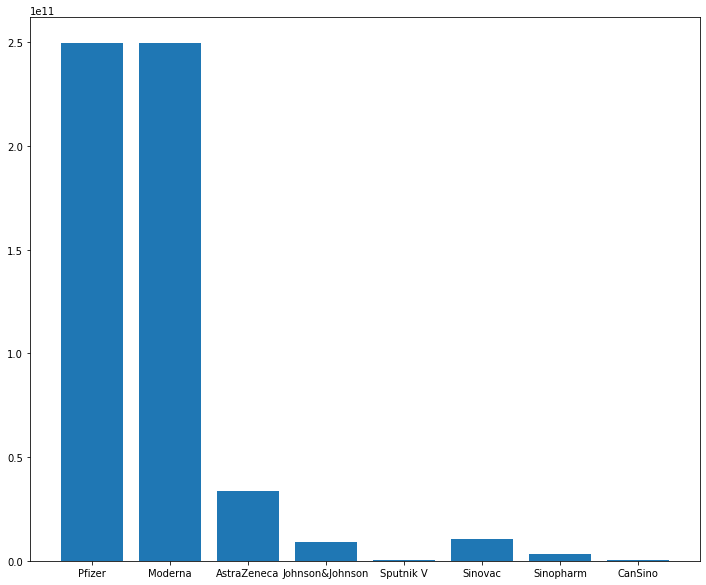

In [ ]:
x_axis = vaccine_dict.keys()
f = operator.itemgetter(*x_axis)
y_axis = f(vaccine_dict)

plt.figure(figsize=(12,10))
plt.bar(x_axis, y_axis)
plt.xticks(range(len(x_axis)),x_axis)
plt.show()

In [ ]:
vaccines_sum = pd.DataFrame(vaccine_dict.items(), columns = ['Vaccine', 'Total Vaccinated'])
vaccines_sum

,Vaccine,Total Vaccinated
0,Pfizer,249577721107
1,Moderna,249577721107
2,AstraZeneca,33689468494
3,Johnson&Johnson,9267812245
4,Sputnik V,583256931
5,Sinovac,10609283467
6,Sinopharm,3054786676
7,CanSino,168099174


In [110]:
Austria=data.loc[data['iso_code']=='AUT']
Austria.head(100)

,iso_code,continent,location,date,total_cases,new_cases,total_cases_growth,total_deaths,new_deaths,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,Entity,Code,Day,Pfizer/BioNTech,Pfizer_growth,Moderna,Moderna_growth,Oxford/AstraZeneca,Oxford/AstraZeneca_growth,Johnson&Johnson,Johnson&Johnson_growth,Sputnik V,Sputnik V_growth,Sinovac,Sinovac_growth,Sinopharm/Beijing,Sinopharm/Beijing_growth,CanSino,CanSino_growth
0,AUT,Europe,Austria,08/01/2021,376793,2063.0,0.000000,6641,73.0,NaN,NaN,tests performed,24739.0,24739.0,NaN,NaN,13296.0,9043072,Austria,AUT,08/01/2021,31523,0,0,0.000000,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0
1,AUT,Europe,Austria,15/01/2021,390788,1528.0,0.037142,6987,66.0,NaN,NaN,tests performed,104393.0,104389.0,4.0,NaN,18657.0,9043072,Austria,AUT,15/01/2021,116861,2.707166196,94,0.000000,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0
2,AUT,Europe,Austria,22/01/2021,401886,2088.0,0.028399,7330,42.0,NaN,NaN,tests performed,210517.0,205531.0,4984.0,2.0,11678.0,9043072,Austria,AUT,22/01/2021,214527,0.83574503,332,2.531915,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0
3,AUT,Europe,Austria,29/01/2021,411730,1500.0,0.024495,7658,51.0,NaN,NaN,tests performed,258906.0,239749.0,19155.0,2.0,15282.0,9043072,Austria,AUT,29/01/2021,259636,0.210271901,4324,12.024096,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0
4,AUT,Europe,Austria,05/02/2021,421189,1388.0,0.022974,7973,37.0,0.0121,82.5,tests performed,347942.0,256700.0,91235.0,7.0,21571.0,9043072,Austria,AUT,05/02/2021,355977,0.371061794,6036,0.395930,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0
5,AUT,Europe,Austria,12/02/2021,430870,1731.0,0.022985,8170,32.0,0.0066,151.7,tests performed,466716.0,282932.0,183776.0,8.0,27178.0,9043072,Austria,AUT,12/02/2021,458112,0.286914604,10154,0.682240,10805,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0
6,AUT,Europe,Austria,19/02/2021,441659,1818.0,0.025040,8348,36.0,0.0073,137.5,tests performed,563328.0,335187.0,228123.0,18.0,21691.0,9043072,Austria,AUT,19/02/2021,524249,0.144368626,14315,0.409789,43640,3.038870893,0,0,0,0.0,0,0.0,0,0.0,0,0.0
7,AUT,Europe,Austria,26/02/2021,454860,2093.0,0.029890,8515,22.0,0.0086,116.7,tests performed,675088.0,425997.0,249074.0,18.0,29763.0,9043072,Austria,AUT,26/02/2021,585847,0.117497601,22788,0.591897,101581,1.327703941,1,0,0,0.0,0,0.0,0,0.0,0,0.0
8,AUT,Europe,Austria,05/03/2021,470314,2668.0,0.033975,8669,17.0,0.0091,109.4,tests performed,839829.0,576356.0,263457.0,18.0,37712.0,9043072,Austria,AUT,05/03/2021,690854,0.179239631,32166,0.411532,156702,0.542631004,4,3,0,0.0,0,0.0,0,0.0,0,0.0
9,AUT,Europe,Austria,12/03/2021,488042,3126.0,0.037694,8831,33.0,0.0099,100.6,tests performed,1054905.0,767526.0,287366.0,19.0,59290.0,9043072,Austria,AUT,12/03/2021,854539,0.236931392,47596,0.479699,235746,0.504422407,6,0.5,0,0.0,0,0.0,0,0.0,0,0.0


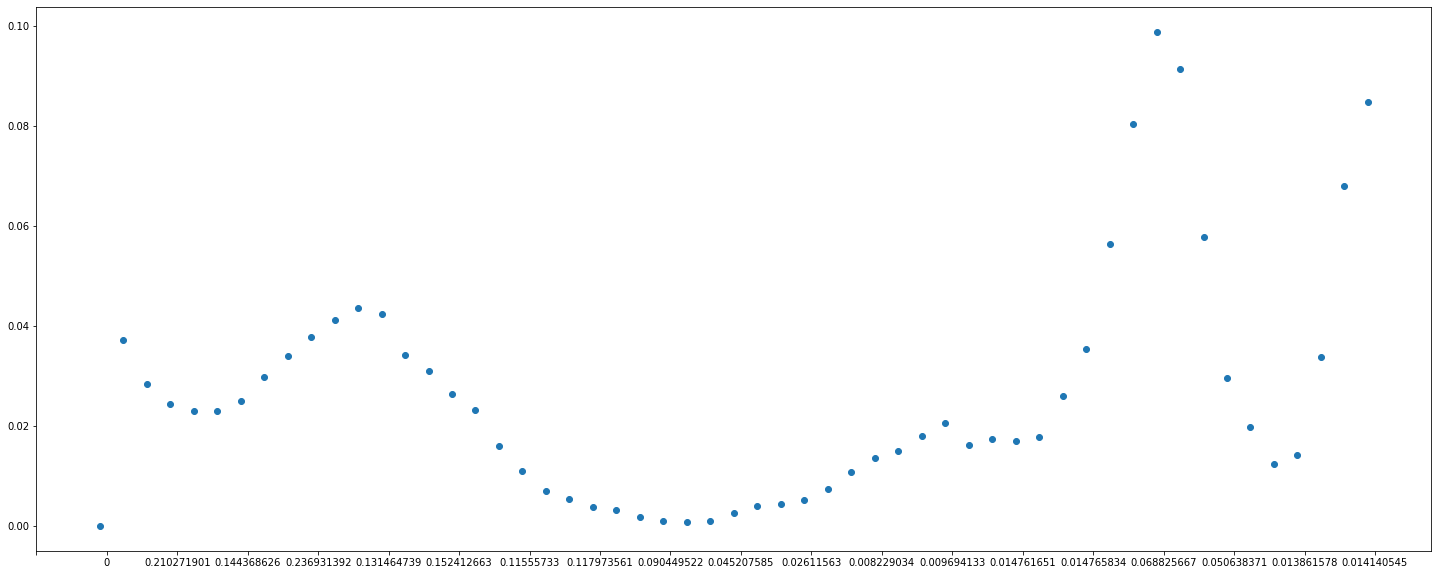

In [117]:

fig,ax=plt.subplots()
fig.set_figwidth(25)
fig.set_figheight(10)
ax.scatter(Austria['Pfizer_growth'],Austria['total_cases_growth'])
start,end=ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start,end,3))
plt.show()

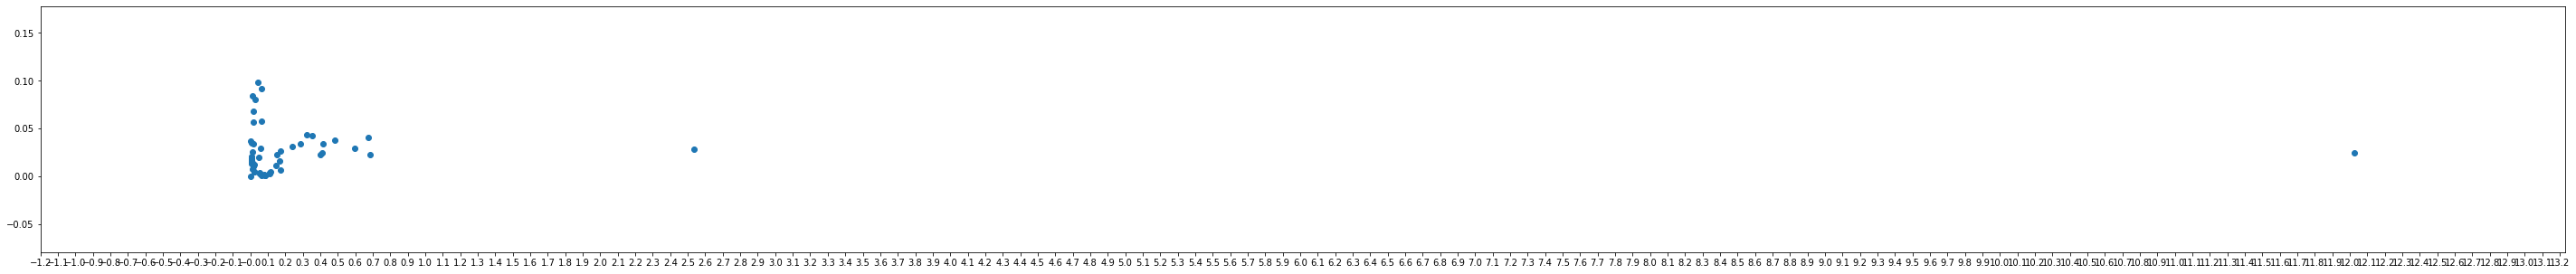

In [114]:
fig,ax=plt.subplots()
ax.margins(0.1,0.8)
fig.set_figwidth(50)
fig.set_figheight(5)
ax.scatter(Austria['Moderna_growth'],Austria['total_cases_growth'])
start,end=ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start,end,0.1))
plt.show()

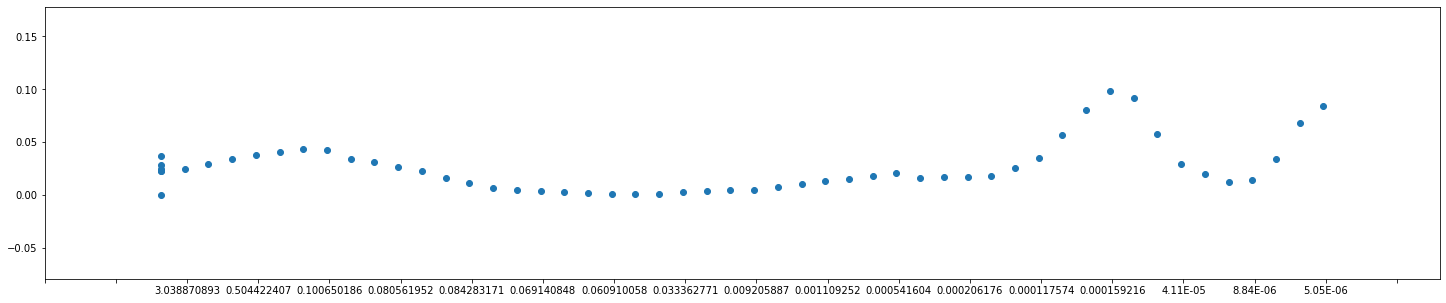

In [99]:
fig,ax=plt.subplots()
ax.margins(0.1,0.8)
fig.set_figwidth(25)
fig.set_figheight(5)
ax.scatter(Austria['Oxford/AstraZeneca_growth'],Austria['total_cases_growth'])
start,end=ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start,end,3))
plt.show()

In [ ]:
Austria.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   iso_code                   55 non-null     object 
 1   continent                  55 non-null     object 
 2   location                   55 non-null     object 
 3   date                       55 non-null     object 
 4   total_cases                55 non-null     int64  
 5   new_cases                  55 non-null     float64
 6   total_cases_growth         55 non-null     float64
 7   total_deaths               55 non-null     int64  
 8   new_deaths                 55 non-null     float64
 9   positive_rate              51 non-null     float64
 10  tests_per_case             51 non-null     float64
 11  tests_units                55 non-null     object 
 12  total_vaccinations         55 non-null     float64
 13  people_vaccinated          55 non-null     float64
 

In [108]:
scaler=StandardScaler()
Austria['Pfizer_growth']=scaler.fit_transform(Austria['Pfizer_growth'].values.reshape(-1,1))
Austria['total_cases_growth']=scaler.fit_transform(Austria['total_cases_growth'].values.reshape(-1,1))
target=Austria['Pfizer_growth'].values.reshape(-1,1)
features=Austria['total_cases_growth'].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test= train_test_split(features,target,test_size=0.2)
lr=LinearRegression()
lr.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


LinearRegression()

R2 score of the regression model = -0.1000135539833682
MSE of the regression model = 4.528264537623466


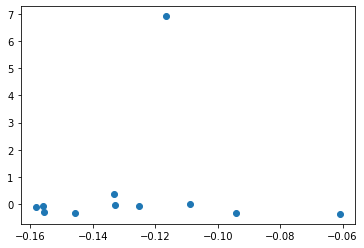

In [70]:
predictions=lr.predict(X_test)
r2= r2_score(Y_test,predictions)
mse=mean_squared_error(Y_test,predictions)
print(f'R2 score of the regression model = {r2}')
print(f'MSE of the regression model = {mse}')

plt.scatter(predictions, Y_test)

In [91]:
scaler=StandardScaler()
Austria['Moderna_growth']=scaler.fit_transform(Austria['Moderna_growth'].values.reshape(-1,1))
Austria['total_cases_growth']=scaler.fit_transform(Austria['total_cases_growth'].values.reshape(-1,1))
target=Austria['Moderna_growth'].values.reshape(-1,1)
features=Austria['total_cases_growth'].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test= train_test_split(features,target,test_size=0.2)
lr=LinearRegression()
lr.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


LinearRegression()

R2 score of the regression model = -0.00898819105046722
MSE of the regression model = 0.7306596508915181


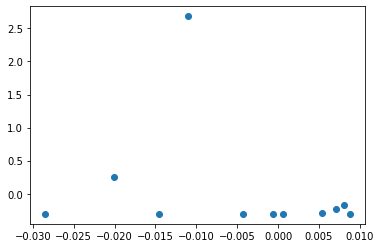

In [120]:
predictions=lr.predict(X_test)
r2= r2_score(Y_test,predictions)
mse=mean_squared_error(Y_test,predictions)
print(f'R2 score of the regression model = {r2}')
print(f'MSE of the regression model = {mse}')

plt.scatter(predictions, Y_test)

In [118]:
scaler=StandardScaler()
Austria['Oxford/AstraZeneca_growth']=scaler.fit_transform(Austria['Oxford/AstraZeneca_growth'].values.reshape(-1,1))
Austria['total_cases_growth']=scaler.fit_transform(Austria['total_cases_growth'].values.reshape(-1,1))
target=Austria['Oxford/AstraZeneca_growth'].values.reshape(-1,1)
features=Austria['total_cases_growth'].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test= train_test_split(features,target,test_size=0.2)
lr=LinearRegression()
lr.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


LinearRegression()

R2 score of the regression model = -0.00898819105046722
MSE of the regression model = 0.7306596508915181


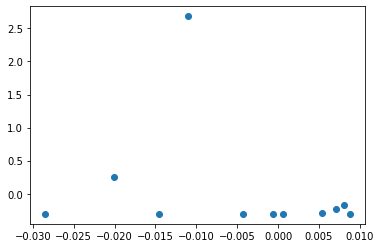

In [119]:
predictions=lr.predict(X_test)
r2= r2_score(Y_test,predictions)
mse=mean_squared_error(Y_test,predictions)
print(f'R2 score of the regression model = {r2}')
print(f'MSE of the regression model = {mse}')

plt.scatter(predictions, Y_test)

In [124]:
Belgium=data.loc[data['iso_code']=='BEL']
Belgium.head(100)

,iso_code,continent,location,date,total_cases,new_cases,total_cases_growth,total_deaths,new_deaths,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,Entity,Code,Day,Pfizer/BioNTech,Pfizer_growth,Moderna,Moderna_growth,Oxford/AstraZeneca,Oxford/AstraZeneca_growth,Johnson&Johnson,Johnson&Johnson_growth,Sputnik V,Sputnik V_growth,Sinovac,Sinovac_growth,Sinopharm/Beijing,Sinopharm/Beijing_growth,CanSino,CanSino_growth
55,BEL,Europe,Belgium,08/01/2021,660703,2048.0,0.000000,19992,56.0,0.055,18.2,tests performed,24790.0,24769.0,167.0,NaN,9428.0,11632334,Belgium,BEL,08/01/2021,28258,0,0,0.000000,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0
56,BEL,Europe,Belgium,15/01/2021,675089,2203.0,0.021774,20352,58.0,0.052,19.2,tests performed,119618.0,119426.0,428.0,NaN,23711.0,11632334,Belgium,BEL,15/01/2021,127426,3.509377875,58,0.000000,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0
57,BEL,Europe,Belgium,22/01/2021,689271,2444.0,0.021008,20675,55.0,0.057,17.5,tests performed,241336.0,240208.0,1507.0,NaN,30238.0,11632334,Belgium,BEL,22/01/2021,245544,0.926953683,4562,77.655172,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0
58,BEL,Europe,Belgium,29/01/2021,705120,2683.0,0.022994,21018,36.0,0.055,18.2,tests performed,338988.0,315396.0,24131.0,NaN,21814.0,11632334,Belgium,BEL,29/01/2021,335691,0.367131756,6288,0.378343,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0
59,BEL,Europe,Belgium,05/02/2021,721432,2585.0,0.023134,21295,35.0,0.053,18.9,tests performed,474469.0,360618.0,114532.0,NaN,31294.0,11632334,Belgium,BEL,05/02/2021,465227,0.38587868,16150,1.568384,0,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0
60,BEL,Europe,Belgium,12/02/2021,735220,2120.0,0.019112,21599,48.0,0.050,20.0,tests performed,621134.0,394732.0,227225.0,NaN,35243.0,11632334,Belgium,BEL,12/02/2021,601274,0.292431437,25817,0.598576,412,0,0,0,0,0.0,0,0.0,0,0.0,0,0.0
61,BEL,Europe,Belgium,19/02/2021,749739,3437.0,0.019748,21859,38.0,0.063,15.9,tests performed,741087.0,438261.0,303747.0,NaN,31537.0,11632334,Belgium,BEL,19/02/2021,702327,0.168064809,30672,0.188054,11032,25.77669903,0,0,0,0.0,0,0.0,0,0.0,0,0.0
62,BEL,Europe,Belgium,26/02/2021,766654,2769.0,0.022561,22034,28.0,0.068,14.7,tests performed,871010.0,530024.0,342000.0,NaN,32462.0,11632334,Belgium,BEL,26/02/2021,791460,0.126910969,33208,0.082681,45809,3.152374909,0,0,0,0.0,0,0.0,0,0.0,0,0.0
63,BEL,Europe,Belgium,05/03/2021,783010,2759.0,0.021334,22215,19.0,0.062,16.1,tests performed,1040791.0,666718.0,375189.0,NaN,45475.0,11632334,Belgium,BEL,05/03/2021,881152,0.113324742,52194,0.571730,110826,1.41930625,0,0,0,0.0,0,0.0,0,0.0,0,0.0
64,BEL,Europe,Belgium,12/03/2021,801723,3615.0,0.023899,22397,27.0,0.067,14.9,tests performed,1234508.0,816550.0,419211.0,NaN,45527.0,11632334,Belgium,BEL,12/03/2021,978131,0.110059331,68244,0.307507,192391,0.735973508,0,0,0,0.0,0,0.0,0,0.0,0,0.0


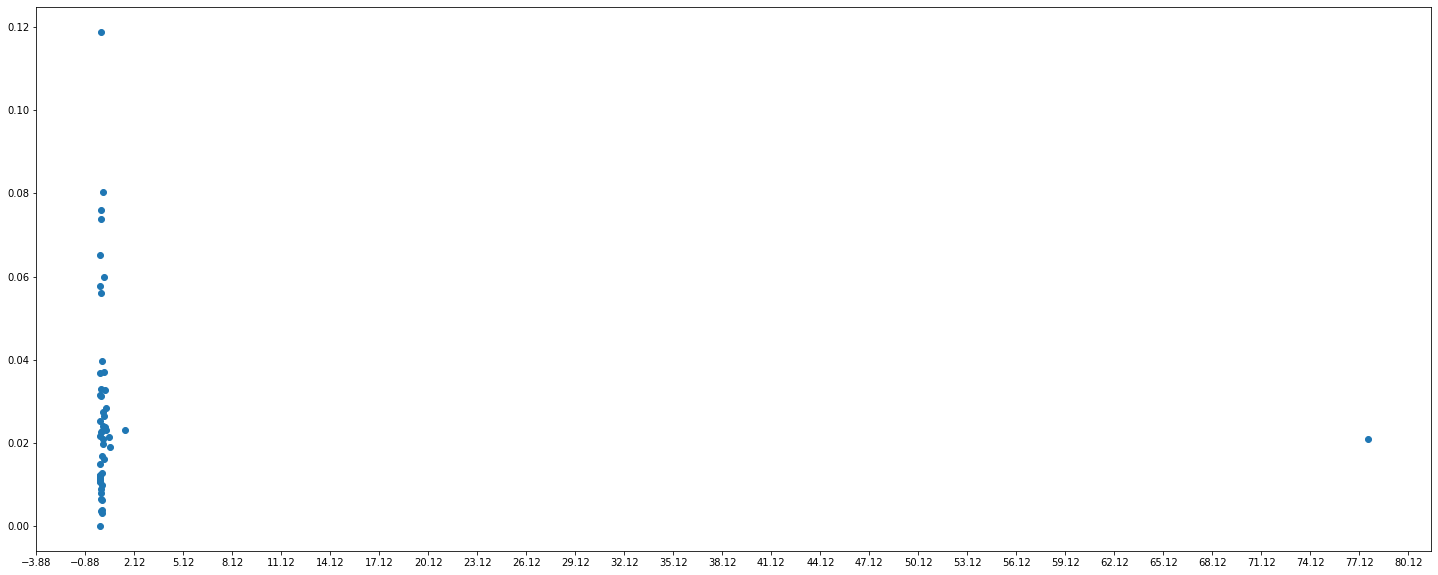

In [125]:
fig,ax=plt.subplots()
fig.set_figwidth(25)
fig.set_figheight(10)
ax.scatter(Belgium['Moderna_growth'],Belgium['total_cases_growth'])
start,end=ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start,end,3))
plt.show()

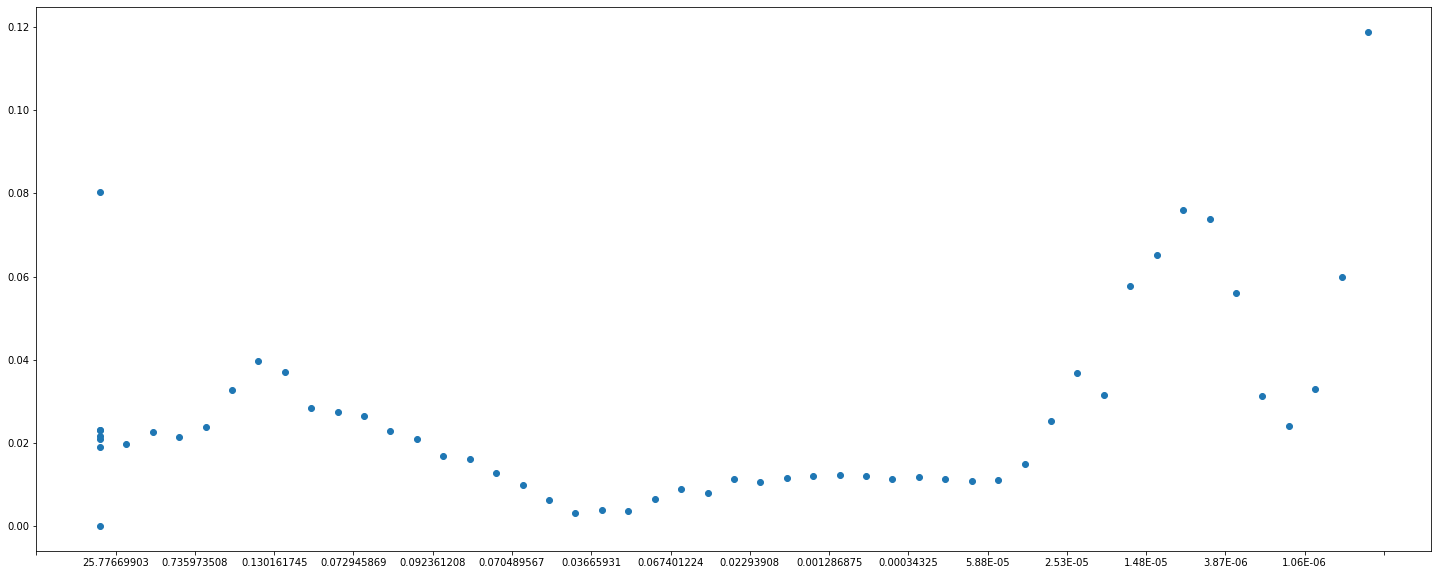

In [127]:
fig,ax=plt.subplots()
fig.set_figwidth(25)
fig.set_figheight(10)
ax.scatter(Belgium['Oxford/AstraZeneca_growth'],Belgium['total_cases_growth'])
start,end=ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start,end,3))
plt.show()